
# 🧠 **Understanding Embeddings with BERT**

In this notebook, we go into the world of embeddings, utilizing the BERT model to understand the semantic relationships between words in different contexts.

## 🛠️ Setup and Installation

Start by installing the necessary libraries to ensure all functionalities are available.

In [2]:
!pip install transformers==4.29.2
!pip install scipy==1.7.3

## 📚 Importing Libraries

Import essential modules for our tasks.

In [1]:
from transformers import BertModel, AutoTokenizer
from scipy.spatial.distance import cosine

## 🤖 Model Setup

Load the pre-trained BERT model and tokenizer. This model will help us extract embeddings for our analysis.

In [2]:
# Defining the model name
model_name = "bert-base-cased"

# Loading the pre-trained model and tokenizer
model = BertModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]


## 📝 Function Definition: Predict

Define a function that encodes input text into tensors, which are then fed to the model to obtain embeddings.

In [3]:
encoded_inputs = tokenizer("There was a fly drinking from my soup", return_tensors="pt")
print(type(encoded_inputs))

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [4]:
# Defining a function to encode the input text and get model predictions
def predict(text):
    encoded_inputs = tokenizer(text, return_tensors="pt")
    return model(**encoded_inputs)[0]

## 📃 Defining the Sentences

Set up sentences to analyze. The

In [5]:
# Defining the sentences
sentence1 = "There was a fly drinking from my soup"
sentence2 = "There is a fly swimming in my juice"
# sentence2 = "To become a commercial pilot, he had to fly for 1500 hours." # second fly example

# Tokenizing the sentences
tokens1 = tokenizer.tokenize(sentence1)
tokens2 = tokenizer.tokenize(sentence2)

## 🔍 Tokenization and Model Predictions

Tokenize the sentences and obtain predictions (embeddings) from the model.

In [6]:
# Getting model predictions for the sentences
out1 = predict(sentence1)
out2 = predict(sentence2)

In [7]:
out1

tensor([[[ 0.5312,  0.2162,  0.0967,  ..., -0.2778,  0.2341, -0.2684],
         [ 0.1996, -0.2155, -0.1150,  ...,  0.1952,  0.5705,  0.0951],
         [ 0.2500, -0.0971,  0.5910,  ...,  0.1830, -0.0093,  0.0130],
         ...,
         [-0.1890, -0.1836,  0.0684,  ..., -0.1357,  0.2555,  0.3643],
         [ 0.2328,  0.0131,  0.2131,  ..., -0.2474, -0.2384,  0.0111],
         [ 1.3495,  0.1425,  0.1270,  ..., -0.5699,  0.5849, -0.7200]]],
       grad_fn=<NativeLayerNormBackward0>)

## 🔄 Extracting Embeddings

Extract embeddings specifically for the word "fly" from both sentences.

In [8]:
# Extracting embeddings for the word 'fly' in both sentences
emb1 = out1[0:, tokens1.index("fly"), :].detach()[0]
emb2 = out2[0:, tokens2.index("fly"), :].detach()[0]

# emb1 = out1[0:, 3, :].detach()
# emb2 = out2[0:, 3, :].detach()

## 📊 Calculating Cosine Similarity

Calculate the cosine similarity between the embeddings of the word "fly" from both sentences to measure how context affects meaning.

In [9]:
# Calculating the cosine similarity between the embeddings
cosine(emb1, emb2)

0.06798790663962284

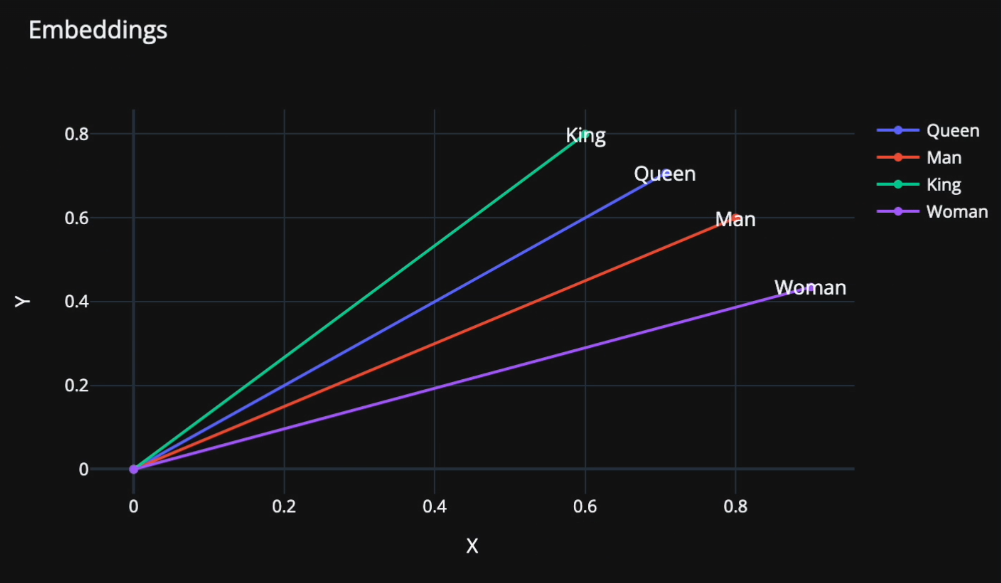

## 🌟 Conclusion

This notebook has guided you through the process of extracting and comparing word embeddings using BERT. Such techniques are fundamental in understanding word semantics and their usage across different contexts.

Experiment by changing the sentences or focusing on different words to see how the embeddings and their similarities vary!